### 1st Virtual Methods Seminar: Methods of Computational Social Science
## Introduction to Social Network Science with Python
# Cohesion (Demo)
Instructors: Haiko Lietz & Olga Zagovora

Date: September 23, 2020
## Packages

In [1]:
import sys
libs_path = '../libs/'
sys.path.append(libs_path)
import compsoc as cs

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

## Introduction
The lecture prepared the ground for cohesion analysis as the analytical process of modeling network cores. Quite generally, social networks with agents as nodes tend to weakly weighted and sparse, cultural networks with facts as nodes tend to be strongly weighted and dense. As a result, two kinds of cohesion analysis are required: graph theoretical methods and simple edge filtering. These are the two sections in this notebook.

## Graph theoretical core detection
These methods have in common that cohesion is analyzed by taking the **structure of relations** into account. We will again be working with the elite families dataset:

In [3]:
families, parties, relations, domains = cs.elite_families_collection(path='../../data/elite_families/')

### All domains
#### DiGraph

In [4]:
relations_unlayered = cs.weighted_edge_list_to_unlayered(relations, function='sum')

In [5]:
G_unlayered = cs.construct_graph(
    directed=True, 
    multiplex=False, 
    graph_name='elite_families_unlayered', 
    node_list=families, 
    edge_list=relations_unlayered, 
    node_pos=['pos_x', 'pos_y'], 
    node_color='partisanship_color', 
    node_shape='party_id', 
    node_label='family'
)

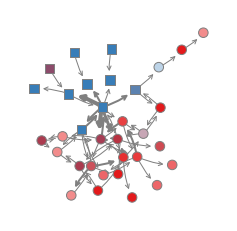

In [6]:
cs.draw_graph(
    G_unlayered, 
    node_size_factor=.1, 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

#### Graph

In [7]:
relations_unlayered_undirected = cs.weighted_edge_list_to_undirected(relations_unlayered)

In [8]:
G_unlayered_undirected = cs.construct_graph(
    directed=False, 
    multiplex=False, 
    graph_name='elite_families_unlayered_undirected', 
    node_list=families, 
    edge_list=relations_unlayered_undirected, 
    node_pos=['pos_x', 'pos_y'], 
    node_color='partisanship_color', 
    node_shape='party_id', 
    node_label='family'
)

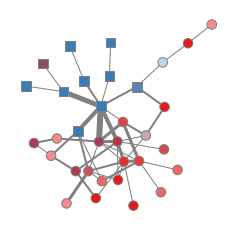

In [9]:
cs.draw_graph(
    G_unlayered_undirected, 
    node_size_factor=.1, 
    figsize='small'
)

### Marriage domain
#### DiGraph

In [10]:
marriage = relations[relations['domain_id'] == 0]

In [11]:
G_marriage = cs.construct_graph(
    directed=True, 
    multiplex=False, 
    graph_name='elite_families_marriage', 
    node_list=families, 
    edge_list=marriage, 
    node_pos=['pos_x', 'pos_y'], 
    node_color='partisanship_color', 
    node_shape='party_id', 
    node_label='family'
)

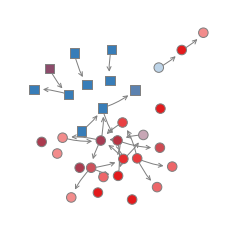

In [12]:
cs.draw_graph(
    G_marriage, 
    node_size_factor=.1, 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

#### Graph

In [13]:
marriage_undirected = cs.weighted_edge_list_to_undirected(marriage)

In [14]:
G_marriage_undirected = cs.construct_graph(
    directed=False, 
    multiplex=False, 
    graph_name='elite_families_marriage_undirected', 
    node_list=families, 
    edge_list=marriage_undirected, 
    node_pos=['pos_x', 'pos_y'], 
    node_color='partisanship_color', 
    node_shape='party_id', 
    node_label='family'
)

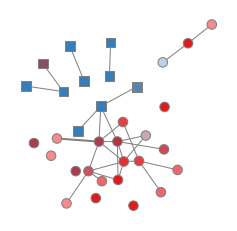

In [15]:
cs.draw_graph(
    G_marriage_undirected, 
    node_size_factor=.1, 
    figsize='small'
)

### Connected Components
Connected components are **maximal subgraphs** of undirected Graphs in which all node pairs are connected by **paths**:

In [16]:
nx.connected_components(G_marriage_undirected)

<generator object connected_components at 0x7fb237b7dac0>

Generate a list of component node sets:

In [17]:
sets_nodes_cc = [c for c in sorted(nx.connected_components(G_marriage_undirected), key=len, reverse=True)]
sets_nodes_cc

[{0, 1, 2, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25},
 {3, 4, 5},
 {30, 31, 32},
 {6, 7},
 {8, 9},
 {10},
 {14},
 {26},
 {27},
 {28},
 {29}]

To draw the largest connected component, identify the nodes ...

In [18]:
nodes_lcc = max(nx.connected_components(G_marriage_undirected), key=len) # or:
nodes_lcc = sets_nodes_cc[0]

... and extract a `subgraph()`:

In [19]:
G_marriage_undirected_lcc = G_marriage_undirected.subgraph(nodes_lcc)

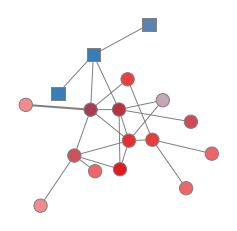

In [20]:
cs.draw_graph(
    G_marriage_undirected_lcc, 
    node_size_factor=.1, 
    figsize='small'
)

Alternatively, highlight the largest connected component in the whole graph:

In [21]:
def highlights(g, nodes):
    d = dict(zip(g.nodes, g.number_of_nodes()*['white']))
    for node in nodes:
        d.update({node: 'black'})
    return d

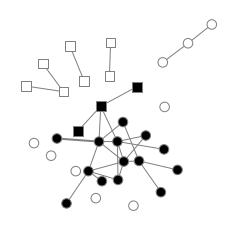

In [22]:
cs.draw_graph(
    G_marriage_undirected, 
    node_size_factor=.1, 
    node_color=highlights(G_marriage_undirected, nodes_lcc), 
    figsize='small'
)

### Cutpoints
A cutpoint is a node whose removal will increase the number of connected components. The method is not implemented for DiGraphs:

In [23]:
nx.articulation_points(G_marriage_undirected)

<generator object articulation_points at 0x7fb237e22970>

In [24]:
nodes_cut = [v for v in sorted(nx.articulation_points(G_marriage_undirected))]
nodes_cut

[0, 3, 12, 16, 20, 23, 30]

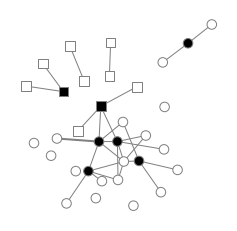

In [25]:
cs.draw_graph(
    G_marriage_undirected, 
    node_size_factor=.1, 
    node_color=highlights(G_marriage_undirected, nodes_cut), 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

### Weakly connected components
Weakly connected components are maximal subgraphs of directed DiGraphs in which all node pairs are connected by paths, neglecting edge directions. Subgraphs are similar to the connected components of the corresponding undirected Graph:

In [26]:
nx.weakly_connected_components(G_marriage)

<generator object weakly_connected_components at 0x7fb237e222e0>

In [27]:
sets_nodes_wcc = [c for c in sorted(nx.weakly_connected_components(G_marriage), key=len, reverse=True)]
sets_nodes_wcc

[{0, 1, 2, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25},
 {3, 4, 5},
 {30, 31, 32},
 {6, 7},
 {8, 9},
 {10},
 {14},
 {26},
 {27},
 {28},
 {29}]

In [28]:
nodes_lwcc = max(nx.weakly_connected_components(G_marriage), key=len) # or:
nodes_lwcc = sets_nodes_wcc[0]

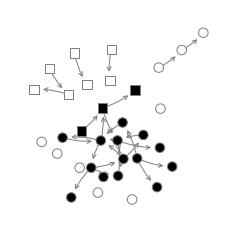

In [29]:
cs.draw_graph(
    G_marriage, 
    node_size_factor=.1, 
    node_color=highlights(G_marriage, nodes_lwcc), 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

### Strongly connected components
Strongly connected components are maximal subgraphs of directed DiGraphs in which all node pairs are connected by paths, not neglecting edge directions:

In [30]:
nx.strongly_connected_components(G_marriage)

<generator object strongly_connected_components at 0x7fb23885b740>

In [31]:
sets_nodes_scc = [c for c in sorted(nx.strongly_connected_components(G_marriage), key=len, reverse=True)]
sets_nodes_scc

[{0, 11, 12, 13, 15, 16, 20, 22, 23, 25},
 {1},
 {17},
 {18},
 {21},
 {24},
 {2},
 {4},
 {3},
 {5},
 {6},
 {7},
 {8},
 {9},
 {10},
 {14},
 {19},
 {26},
 {27},
 {28},
 {29},
 {31},
 {30},
 {32}]

In [32]:
nodes_lscc = max(nx.strongly_connected_components(G_marriage), key=len) # or:
nodes_lscc = sets_nodes_scc[0]

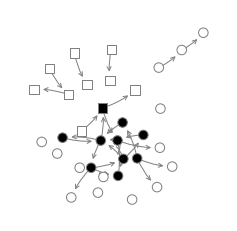

In [33]:
cs.draw_graph(
    G_marriage, 
    node_size_factor=.1, 
    node_color=highlights(G_marriage, nodes_lscc), 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

### Bicomponents
Biconnected components or bicomponents are maximal subgraphs that cannot be disconnected by the removal of any single node. The method is not implemented for DiGraphs:

In [34]:
nx.biconnected_components(G_unlayered_undirected)

<generator object biconnected_components at 0x7fb2389f8120>

In [35]:
sets_nodes_bicomp = [c for c in sorted(nx.biconnected_components(G_unlayered_undirected), key=len, reverse=True)]
sets_nodes_bicomp

[{0, 1, 2, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 25, 26, 27, 28, 29},
 {14, 15},
 {20, 21},
 {23, 24},
 {16, 17},
 {16, 18},
 {30, 31},
 {30, 32},
 {1, 32},
 {3, 4},
 {3, 5},
 {0, 3},
 {6, 7},
 {0, 6},
 {8, 9},
 {0, 8}]

In [36]:
nodes_lbicomp = max(nx.biconnected_components(G_unlayered_undirected), key=len) # or:
nodes_lbicomp = sets_nodes_bicomp[0]

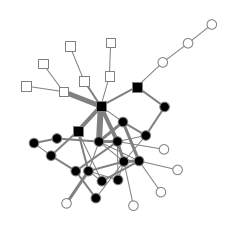

In [37]:
cs.draw_graph(
    G_unlayered_undirected, 
    node_size_factor=.1, 
    node_color=highlights(G_unlayered_undirected, nodes_lbicomp), 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

### k-components
$k$-components are maximal subgraphs that cannot be disconnected by the removal of by the removal of any $k$ nodes. Bicomponents are the special case for $k=2$. The method may identify multiple overlapping $k$-components with similar connectivity $k$. It is not implemented for DiGraphs:

In [38]:
nx.k_components(G_unlayered_undirected)

{3: [{0, 2, 12, 13, 15, 16, 19, 20, 22, 23, 25}],
 2: [{0, 1, 2, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 25, 26, 27, 28, 29}],
 1: [{0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32}]}

In [39]:
k = 3

sets_nodes_kcomp = [c for c in sorted(nx.k_components(G_unlayered_undirected)[k], key=len, reverse=True)]
sets_nodes_kcomp

[{0, 2, 12, 13, 15, 16, 19, 20, 22, 23, 25}]

In [40]:
nodes_lkcomp = max(nx.k_components(G_unlayered_undirected)[k], key=len) # or:
nodes_lkcomp = sets_nodes_kcomp[0]

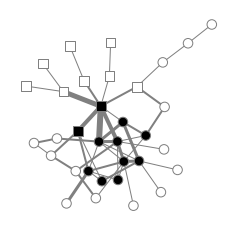

In [41]:
cs.draw_graph(
    G_unlayered_undirected, 
    node_size_factor=.1, 
    node_color=highlights(G_unlayered_undirected, nodes_lkcomp), 
    figsize='small'
)

### k-cores
$k$-cores are maximal subgraphs that contain nodes of degree $k$ or more. networkx has the `k_core()` method to directly extract $k$-cores as subgraphs:

In [42]:
#G_unlayered_undirected = nx.Graph({0: [1, 2], 1: [2], 3: [4, 6], 4: [5], 5: [6]})

In [43]:
k = 2

G_unlayered_undirected_kcores = nx.k_core(G_unlayered_undirected, k=k)

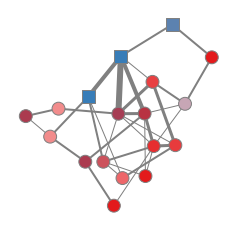

In [44]:
cs.draw_graph(
    G_unlayered_undirected_kcores, 
    node_size_factor=.1, 
    figsize='small'
)

Note, however, that `k_core()` extracts all $k$-cores. To just extract a particular $k$-core, e.g., the largest:

In [45]:
k = 2

G_unlayered_undirected_kcore = nx.k_core(G_unlayered_undirected, k=k)

In [46]:
sets_nodes_kcores = [c for c in sorted(nx.connected_components(G_unlayered_undirected_kcore), key=len, reverse=True)]

In [47]:
nodes_lkcore = max(nx.connected_components(G_unlayered_undirected_kcore), key=len) # or:
nodes_lkcore = sets_nodes_kcores[0]

In [48]:
G_unlayered_undirected_lkcore = G_unlayered_undirected.subgraph(nodes_lkcore)

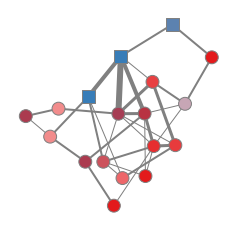

In [49]:
cs.draw_graph(
    G_unlayered_undirected_lkcore, 
    node_size_factor=.1, 
    figsize='small'
)

Alternatively, highlight all $k$-cores ...

In [50]:
nx.core_number(G_unlayered_undirected).values()

dict_values([3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 2, 2, 2, 1, 1, 1])

In [51]:
k = 2

nodes_kcores = {identifier for identifier, core_number in nx.core_number(G_unlayered_undirected).items() if core_number >= k}
nodes_kcores

{0, 1, 2, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 25, 26, 27, 28, 29}

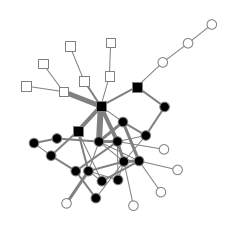

In [52]:
cs.draw_graph(
    G_unlayered_undirected, 
    node_size_factor=.1, 
    node_color=highlights(G_unlayered_undirected, nodes_kcores), 
    figsize='small'
)

... or highlight just the largest $k$-core:

In [53]:
k = 3

G_unlayered_undirected_kcore = nx.k_core(G_unlayered_undirected, k=k)

In [54]:
sets_nodes_kcores = [c for c in sorted(nx.connected_components(G_unlayered_undirected_kcore), key=len, reverse=True)]

In [55]:
nodes_lkcore = max(nx.connected_components(G_unlayered_undirected_kcore), key=len) # or:
nodes_lkcore = sets_nodes_kcores[0]

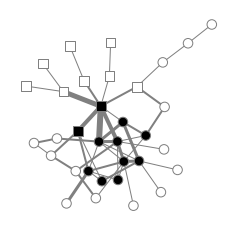

In [56]:
cs.draw_graph(
    G_unlayered_undirected, 
    node_size_factor=.1, 
    node_color=highlights(G_unlayered_undirected, nodes_lkcore), 
    figsize='small'
)

For DiGraphs, the node degree is defined to be the in-degree + out-degree. For example, to highlight the largest directed $k$-core:

In [57]:
k = 5

G_unlayered_kcore = nx.k_core(G_unlayered, k=k)

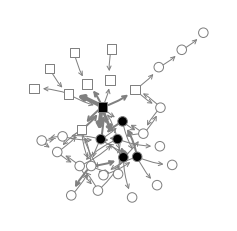

In [58]:
cs.draw_graph(
    G_unlayered, 
    node_size_factor=.1, 
    node_color=highlights(G_unlayered, max(nx.weakly_connected_components(G_unlayered_kcore), key=len)), 
    curved_edges=True, 
    arrow_size=10, 
    figsize='small'
)

## Core detection by filtering co-selections
This method does not take the structure of relations into account. Cores are identified simply by **removing weakly weighted edges**. For the purpose of demonstrating this, we will work with the Social Network Science dataset and the use of scholarly languagein that field:

In [59]:
publications, subfields, authors, authorships, words, usages = cs.sns_collection(path='../../data/sns/')

Again we do some preprocessing to only study language use from 2010 to 2012:

In [60]:
# define all publications published since 2010
publications_2010 = publications[publications['time'] >= 2010]['publication_id']

# identify all word usages made in those publications
usages_2010 = usages[usages['publication_id'].isin(publications_2010)].copy()

# assign a unit weight
usages_2010.loc[:, 'weight'] = 1

In [61]:
usages_2010.head()

,publication_id,word_id,weight
114728,16405,53,1
114729,16405,54,1
114730,16405,119,1
114731,16405,1270,1
114732,16405,1769,1


Project the `usages_2010` selection matrix to the fact `co_usages_2010` matrix using `compsoc`'s `meaning_structures()` function. This function internally calls the `project_selection_matrix()` function used so far. But it automatically makes the projection to the fact co-selection graph (here: word co-usage graph). In addition, this projection can be made for multiple layers (by setting `multiplex=True`) and the facts dataframe (`words`) will automatically be enriched by fact measures from matrix multiplication. Check the description of the function in the compsoc.py file:

In [62]:
_, words, co_usages_2010, _ = cs.meaning_structures(
    selections=usages_2010, 
    transaction_id='publication_id', 
    fact_id='word_id', 
    multiplex=True, 
    transactions=publications, 
    domain_id='subfield_id', 
    facts=words, 
    norm=True
)

The `words` dataframe is now enriched by a few columns. These are the most frequently used linguistic concepts in the field:

In [63]:
words.sort_values('weight', ascending=False).head()

,word_id,word,degree,weight,autocatalysis,embeddedness,sociability
433,433,USER,4428.0,1579.0,161.7981,0.8975,2.8043
0,0,COMMUNITY,4442.0,1232.0,136.9487,0.8888,3.6055
142,142,SOCIAL_NETWORK_ANALYSIS,3978.0,1119.0,140.6529,0.8743,3.5550
55,55,FRIEND,2338.0,668.0,73.7793,0.8896,3.5000
1769,1769,INTERNET,2628.0,632.0,61.7924,0.9022,4.1582


This is the multiplex weighted edge list of word co-usages:

In [64]:
co_usages_2010.head()

,word_id_from,word_id_to,weight,cumfrac,subfield_id
0,58,119,1.129701,0.1074,0
1,58,247,0.475553,0.1821,0
2,58,433,4.351075,0.0404,0
3,58,703,0.326773,0.2288,0
4,58,1051,0.138462,0.4329,0


Construct an undirected multiplex graph. Not that the `edge_list` needs as input a dataframe with four columns in the specified order:

In [65]:
H = cs.construct_graph(
    directed=False, 
    multiplex=True, 
    graph_name='co_usages_2010', 
    node_list=words, 
    node_size='weight', 
    edge_list=co_usages_2010[['word_id_from', 'word_id_to', 'weight', 'subfield_id']], 
    node_label='word'
)

Extract the graph's largest connected component:

In [66]:
H_lcc = H.subgraph(max(nx.connected_components(H), key=len))

See that there are quite a few edges, the average degree is high, and the density is relatively high. All this speaks against graph theoretical cohesion analysis and for edge filtering:

In [67]:
print(nx.info(H_lcc))
print('Density: '+str(round(nx.density(H_lcc), 4)))

Name: co_usages_2010
Type: MultiGraph
Number of nodes: 15707
Number of edges: 350068
Average degree:  44.5748
Density: 0.0028


For example, let's find the `weight` threshold for keeping no more than the 60 strongest word co-usages. We can get that threshold by sorting the `co_usages_2010` dataframe. If we set `weight >= 4.738083` we keep 59 edges:

In [68]:
co_usages_2010.sort_values('weight', ascending=False)[:60].reset_index(drop=True).tail()

,word_id_from,word_id_to,weight,cumfrac,subfield_id
55,142,21,4.830217,0.0126,3
56,433,2309,4.817328,0.0368,0
57,433,4659,4.784682,0.0027,2
58,7836,7649,4.782713,0.0372,0
59,247,433,4.738083,0.0377,0


Construct a filtered graph:

In [69]:
H_weight = cs.construct_graph(
    directed=False, 
    multiplex=True, 
    graph_name='co_usages_2010', 
    node_list=words, 
    node_size='weight', 
    edge_list=co_usages_2010[co_usages_2010['weight'] >= 4.738083][['word_id_from', 'word_id_to', 'weight', 'subfield_id']], 
    node_label='word'
)

Draw the largest connected component:

In [70]:
H_weight_lcc = H_weight.subgraph(max(nx.connected_components(H_weight), key=len))

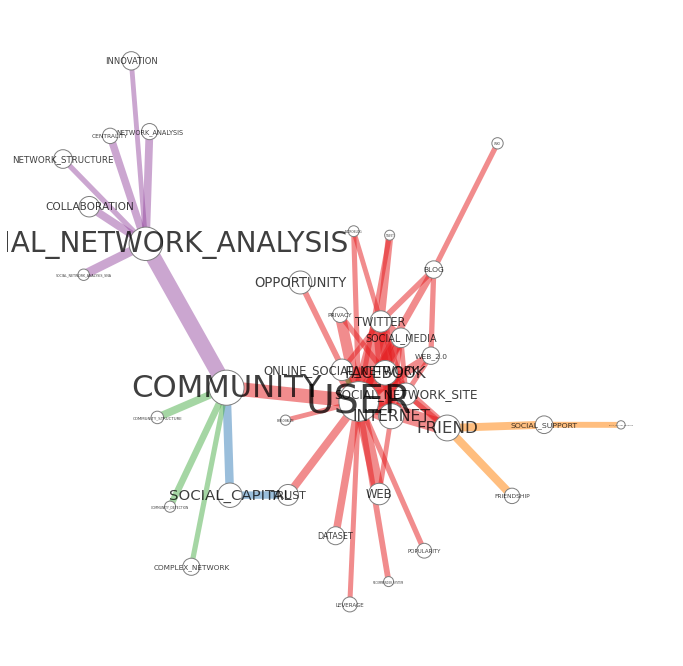

In [71]:
cs.draw_graph(
    H_weight_lcc, 
    #edge_width_factor=.1, 
    edge_transparency=.5, 
    labels='text', 
    font_size_factor=.025, 
    label_transparency=.75, 
    figsize='large'
)

In [72]:
co_usages_2010.head()

,word_id_from,word_id_to,weight,cumfrac,subfield_id
0,58,119,1.129701,0.1074,0
1,58,247,0.475553,0.1821,0
2,58,433,4.351075,0.0404,0
3,58,703,0.326773,0.2288,0
4,58,1051,0.138462,0.4329,0


Now compare this to another way of filtering. The `co_usages_2010` dataframe also has a `cumfrac` column. These **cum**ulative co-selection **frac**tions are computed such that all edge weights at least as strong as the smallest one account for 100 percent of all co-usage weights **in a subfield**. Setting it to 0.5, for example, means that we keep all the strongest edges that account for 50 percent of the attention in a subfield. To compare this way of filtering to filtering by `weight`, let's identify the `cumfrac` threshold we need to also keep no more than 60 edges. The threshold is `cumfrac < 0.0077`:

In [73]:
co_usages_2010.sort_values('cumfrac', ascending=True)[:60].reset_index(drop=True).tail()

,word_id_from,word_id_to,weight,cumfrac,subfield_id
55,433,7836,16.956025,0.0073,0
56,437,433,2.281833,0.0074,2
57,437,520,1.720982,0.0075,1
58,133,334,2.810627,0.0077,4
59,1035,0,2.266081,0.0077,2


Create the graph using this filter, extract the largest component, and draw it:

In [74]:
H_cumfrac = cs.construct_graph(
    directed=False, 
    multiplex=True, 
    graph_name='co_usages_2010', 
    node_list=words, 
    node_size='weight', 
    edge_list=co_usages_2010[co_usages_2010['cumfrac'] < 0.0077][['word_id_from', 'word_id_to', 'weight', 'subfield_id']], 
    node_label='word'
)

In [75]:
H_cumfrac_lcc = H_cumfrac.subgraph(max(nx.connected_components(H_cumfrac), key=len))

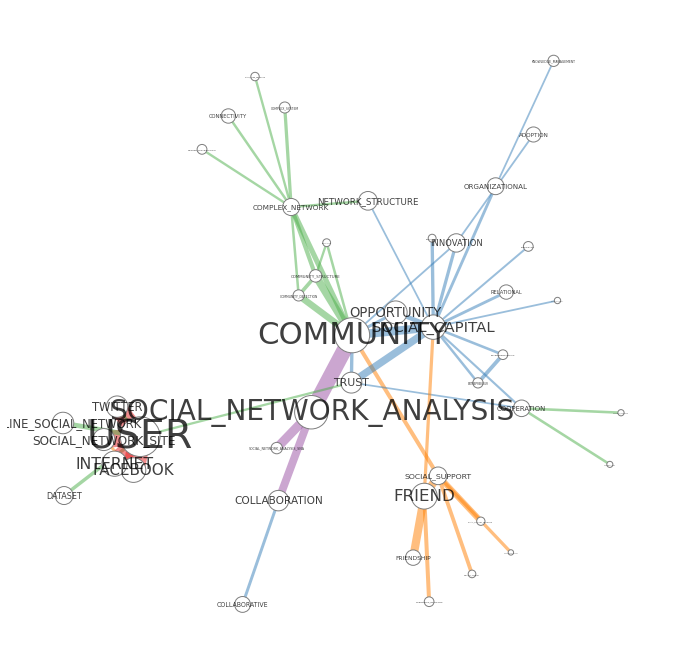

In [76]:
cs.draw_graph(
    H_cumfrac_lcc, 
    edge_transparency=.5, 
    labels='text', 
    font_size_factor=.025, 
    label_transparency=.75, 
    figsize='large'
)

The difference is striking. The red subfield of Social Network Science takes a large fraction of edges for `weight` filtering but a very small one for `cumfrac` filtering. This is because it is a very large subfield. It creates strong word co-usages because of its sheer size. Therefore, if we apply the same absolute threshold for all subfields, small subfields get punished. If we filter by cumulative fractions, however, we keep those edges that account for the top 0.77 percent of the attention per subfield. The red subfield happens to concentrate that much attention in just four co-selections.

A final thought: We have identified cores in sparse and dense networks. But is the above kind of pattern detection something that agents in the field do? To learn about what is taken for granted in their subfield? Thinking about this will turn our network analyses from 3rd-order observation to mechanistic modeling...